In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from os import environ

key_index = ['avg_time',
            'max_time', 
            'med_time',
            'min_time',
            'std_dev']

#
# Read report filename from environment varilable 'file' 
#
filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
if fig_no == 1:
    color_list = ['green']
    fig_size = 10
else:
    color_list = ['green', 'orange', 'red', 'blue']
    fig_size = 20
    
with open(filename) as data_file:
    data = json.load(data_file)
    remove_data = ["video-recording-fps"]
    for item in remove_data:
        del data[item]
    d = pd.DataFrame(data)

# drop empty 'time_list'
for c in d:
    if (d[c]['time_list'] == []) :
        d.drop(c, axis=1, inplace=True)
    
# Select columns and rows
d.loc[key_index, :]

,test_chrome_gdoc_ail_type_0,test_firefox_gdoc_ail_type_0
avg_time,50.2632,95
max_time,52.6316,100
med_time,50,100
min_time,50,50
std_dev,0.789474,15


In [11]:
# Retrive 'run_time' from each run
runtime = pd.DataFrame([pd.DataFrame(d[c]['time_list'])['run_time'] for c in d]).T
runtime.columns = d.columns
runtime

,test_chrome_gdoc_ail_type_0,test_firefox_gdoc_ail_type_0
0,50.000000,50.0
1,50.000000,50.0
2,50.000000,50.0
3,50.000000,100.0
4,50.000000,100.0
5,50.000000,100.0
6,50.000000,100.0
7,50.000000,100.0
8,50.000000,100.0
9,50.000000,100.0


In [12]:
# Report percentile
runtime.quantile([0.01, 0.95, 0.99], interpolation='nearest')

,test_chrome_gdoc_ail_type_0,test_firefox_gdoc_ail_type_0
0.01,50.000000,50.0
0.95,52.631579,100.0
0.99,52.631579,100.0


In [13]:
# Report summary
runtime.describe()

,test_chrome_gdoc_ail_type_0,test_firefox_gdoc_ail_type_0
count,30.000000,30.000000
mean,50.263158,95.000000
std,0.802970,15.256429
min,50.000000,50.000000
25%,50.000000,100.000000
50%,50.000000,100.000000
75%,50.000000,100.000000
max,52.631579,100.000000


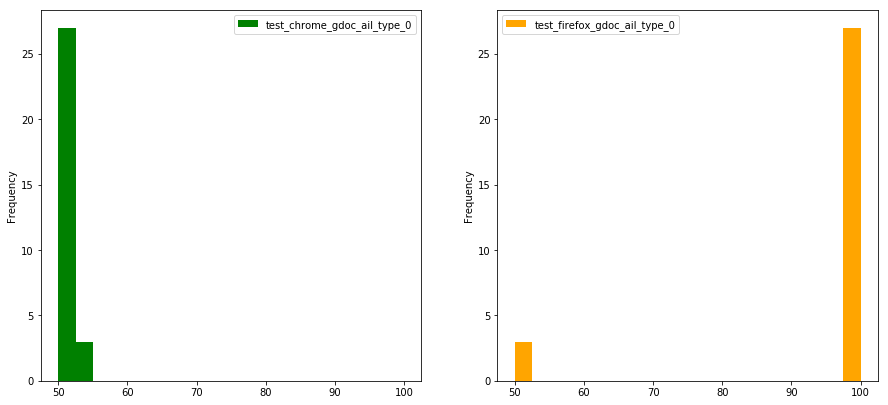

In [14]:
# Plot input latency histogram
runtime.plot.hist(bins=20, 
                  histtype='bar',
                  color=color_list,
                  subplots=True, layout=(1,fig_no),
                  figsize=(fig_size,10),
                  ylim=(0, max(runtime.count())))
runtime.plot.box(subplots=True,
                 layout=(1,fig_no),
                 sharey=True, sharex=True, figsize=(fig_size, 10))
plt.show()
plt.show()